In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file="C:\\Users\\SHWETA BHOYAR\\OneDrive\\Documents\\New folder\\Omkar sir PYTHON\\Full Stack Data Science @ 7_15 AM _ Mr.Omkar [6th Dec] Mr.Omkar-20231223T183622Z-001\\Excel data set\Visadataset.csv"
df=pd.read_csv(file)
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


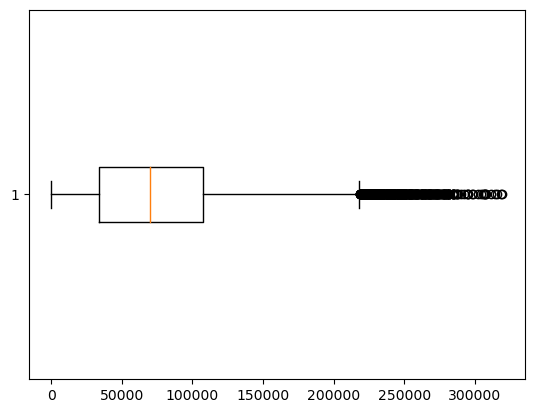

In [7]:
plt.boxplot(df['prevailing_wage'], vert=False)
plt.show()
# orange line : Median value = 50P data
# Black dots all are outliers

Q1-    1.5IQR     Q1 median     Q3 Q3+1.5IQR
                |-----:-----|
o        |------|     :     |--------| o o
                |-----:-----|
          flier <-----------> fliers
                     IQR

- Procedure to find the Outliers

*step-1:

- Calculate Q1 Q2 and Q3

*step-2:

- Calculate IQR=(Q3-Q1)

*step-3:

- Calculate UB=Q3+1.5*IQR
- Calculate LB=Q1-1.5*IQR

*step-4:
- Find the outliers which are having greater than UB
- Find the outliers which are having less than LB

In [15]:
#step-1
Q1=np.quantile(df['prevailing_wage'],0.25)
Q2=np.quantile(df['prevailing_wage'],0.50)
Q3=np.quantile(df['prevailing_wage'],0.75)

#step-2
IQR=Q3-Q1

#Step-3
UB=Q3+1.5*IQR
LB=Q3-1.5*IQR
UB,LB

#Step-4
con1=df['prevailing_wage']>UB
con2=df['prevailing_wage']<LB

#step-5
outliers= df[con1|con2]

In [19]:
def outliers(col):
    Q1=np.quantile(df[col],0.25)
    Q2=np.quantile(df[col],0.50)
    Q3=np.quantile(df[col],0.75)
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    con1=df[col]>UB
    con2=df[col]<LB
    outliers_df=df[con1|con2]
    print(f'{col} has {len(outliers_df)} outliers')
    print('{} has {} outliers'.format(col,len(outliers_df)))
    
num_col=df.select_dtypes(exclude='object').columns
for col in num_col:
    outliers(col)

no_of_employees has 1556 outliers
no_of_employees has 1556 outliers
yr_of_estab has 3260 outliers
yr_of_estab has 3260 outliers
prevailing_wage has 427 outliers
prevailing_wage has 427 outliers


In [21]:
Q1=np.quantile(df['prevailing_wage'],0.25)
Q2=np.quantile(df['prevailing_wage'],0.50)
Q3=np.quantile(df['prevailing_wage'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR
############ Outliers df #################
con1=df['prevailing_wage']>UB
con2=df['prevailing_wage']<LB
outliers_df=df[con1|con2]
########## Non outliers df ###############
con11=df['prevailing_wage']<UB
con22=df['prevailing_wage']>LB
non_outliers_df=df[con11&con22]

In [22]:
len(non_outliers_df),len(outliers_df)


(25053, 427)

In [23]:
len(non_outliers_df)+len(outliers_df)

25480

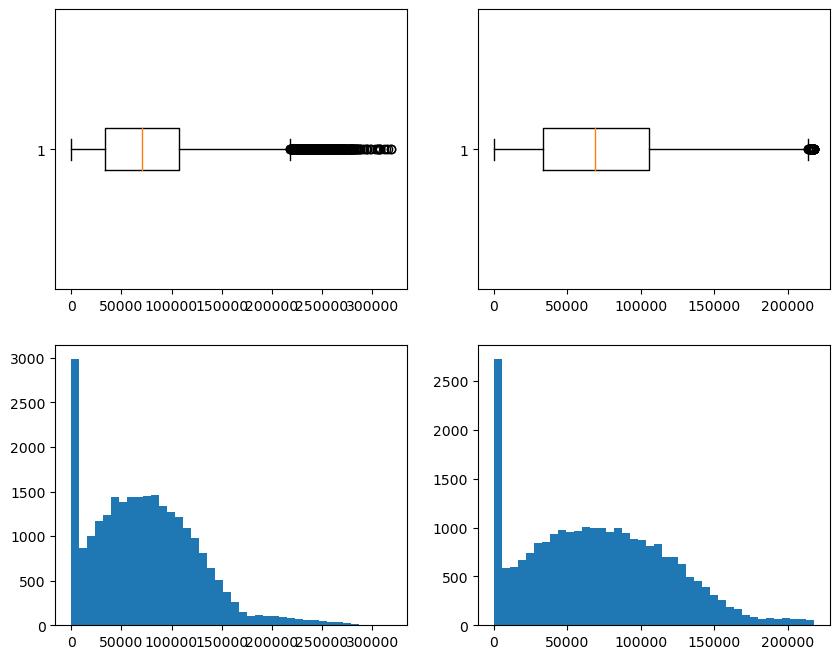

In [25]:
# Will compare
# Total data (25480) vs Non outliers data (25053)
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.boxplot(df['prevailing_wage'],vert=False) # 25480
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],vert=False) # 25053
plt.subplot(2,2,3)
plt.hist(df['prevailing_wage'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],bins=40)
plt.show()

- How to deal outliers
- Drop the outliers based some percentage
- if you have very huge data
- and the outliers percentage is <2 , then drop the outliers
- Drop the outliers means , we are removing some rows all the columns
- In the above examples total count=25480, outliers are =427 , 427*100/25480 = 1.6
- After removing 427 observations, we have 25053 observation (98% of data)
- Impute (Fill) the outliers with Median value
- We alreday know that outliers doesnt affect Median value
- So if you dont want loss the data, and you want fill the outliers then use Median
- Impute (Fill) with UB and LB values (Capping)
- Fill the outliers with UB value, which are having >UB
- Fill the outliers with LB value, which are having <LB

In [26]:
# Fill the outliers
# Missing values
# Bi variate multivariate
# Cate to num
# standard
# Transformation
# Feature selection
# PCA